In [18]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [19]:
data = pd.read_csv('parsing/123.csv')

In [20]:
def replace_cdx(cdx):
    if cdx == "Доллар США":
        return "dollar"
    elif cdx == "Китайский юань":
        return "yuan"
    elif cdx == "Евро":
        return "euro"
    return "pound"

In [21]:
data.cdx = data.cdx.apply(replace_cdx)

In [22]:
data

,data,curs,cdx
0,2024-03-02,91.3336,dollar
1,2024-03-01,90.8423,dollar
2,2024-02-29,91.8692,dollar
3,2024-02-28,92.0425,dollar
4,2024-02-27,92.6321,dollar
...,...,...,...
9547,2014-07-05,58.8993,pound
9548,2014-07-04,58.6579,pound
9549,2014-07-03,58.7381,pound
9550,2014-07-02,58.5359,pound


In [23]:
dollar = data.loc[data.cdx == "dollar"]
euro = data.loc[data.cdx == "euro"]
yuan = data.loc[data.cdx == "yuan"]
pound = data.loc[data.cdx == "pound"]


In [24]:
dollar["date2"] = dollar.data.apply(lambda x: "-".join(x.split("-")[:-1]))
dollar = dollar.rename(columns={"curs": "dollar_curs"})

euro["date2"] = euro.data.apply(lambda x: "-".join(x.split("-")[:-1]))
euro = euro.rename(columns={"curs": "euro_curs"})

yuan["date2"] = yuan.data.apply(lambda x: "-".join(x.split("-")[:-1]))
yuan = yuan.rename(columns={"curs": "yuan_curs"})

pound["date2"] = pound.data.apply(lambda x: "-".join(x.split("-")[:-1]))
pound = pound.rename(columns={"curs": "pound_curs"})

In [25]:
data2 = pd.read_csv("parsing/124.csv")

In [26]:
data2 = data2.rename(columns={
    "Дата": "date2", 
    "Ключевая ставка, % годовых": "rate",
    "Инфляция, % г/г": "inflation"
})

In [27]:
data2 = data2.drop(["Цель по инфляции"], axis=1)

In [28]:
data2.date2 = data2.date2.apply(lambda x: "{}-{:0>2}".format(*str(x).split(".")[::-1]))

In [29]:
data2

,date2,rate,inflation
0,2024-02,16.0,7.69
1,2024-01,16.0,7.44
2,2023-12,16.0,7.42
3,2023-11,15.0,7.48
4,2023-10,15.0,6.69
...,...,...,...
108,2015-02,15.0,16.70
109,2015-01,17.0,14.96
110,2014-12,17.0,11.35
111,2014-11,9.5,9.06


In [30]:
data = dollar[["dollar_curs", "date2"]].merge(data2, on="date2")
data = data.merge(euro[["euro_curs", "date2"]], on="date2")
data = data.merge(pound[["pound_curs", "date2"]], on="date2")
data = data.merge(yuan[["yuan_curs", "date2"]], on="date2")

In [31]:
data.head()

,dollar_curs,date2,rate,inflation,euro_curs,pound_curs,yuan_curs
0,91.8692,2024-02,16.0,7.69,99.45,116.5177,12.7085
1,91.8692,2024-02,16.0,7.69,99.45,116.5177,12.7357
2,91.8692,2024-02,16.0,7.69,99.45,116.5177,12.7809
3,91.8692,2024-02,16.0,7.69,99.45,116.5177,12.7951
4,91.8692,2024-02,16.0,7.69,99.45,116.5177,12.8039


In [33]:
data = data.drop("date2", axis=1)

In [34]:
data.columns

Index(['dollar_curs', 'rate', 'inflation', 'euro_curs', 'pound_curs',
       'yuan_curs'],
      dtype='object')

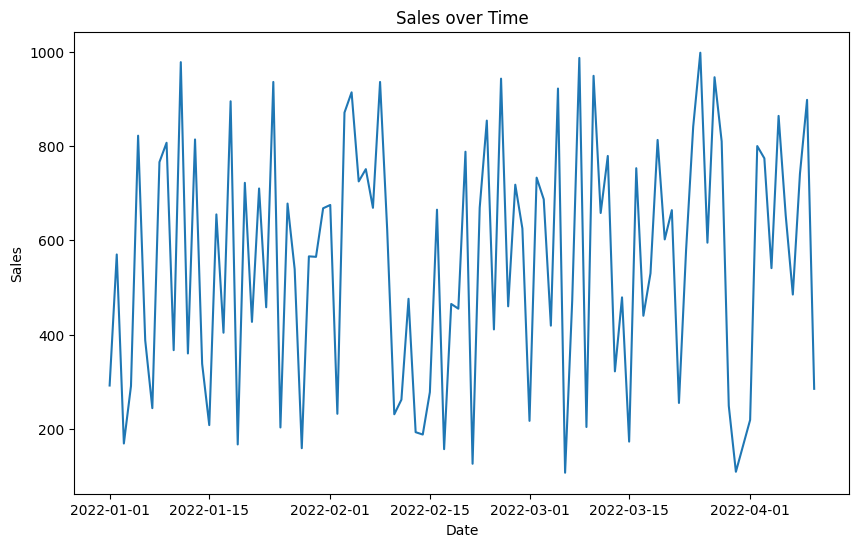

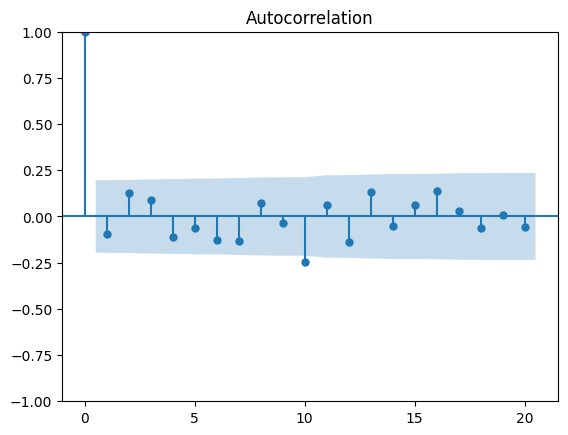

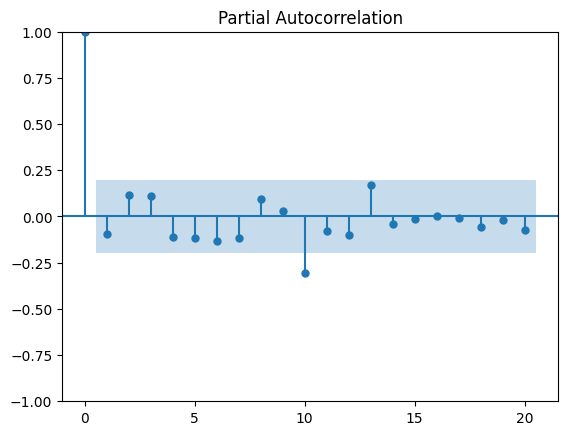

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -693.402
Date:                Wed, 03 Apr 2024   AIC                           1394.803
Time:                        01:28:55   BIC                           1405.184
Sample:                    01-01-2022   HQIC                          1399.003
                         - 04-10-2022                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Marketing Spend     0.0016      0.023      0.068      0.946      -0.044       0.047
ar.L1              -0.0869      0.108     -0.801      0.423      -0.300       0.126
ma.L1              -0.9997      

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example dataset
data = {
    'Date': pd.date_range(start='2022-01-01', periods=100, freq='D'),
    'Sales': np.random.randint(100, 1000, 100),
    'Marketing Spend': np.random.randint(1000, 5000, 100)
}
df = pd.DataFrame(data)

# Set Date column as index
df.set_index('Date', inplace=True)

# Plot the sales data
plt.figure(figsize=(10, 6))
plt.plot(df['Sales'])
plt.title('Sales over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Check ACF and PACF plots to determine ARIMA parameters
plot_acf(df['Sales'])
plot_pacf(df['Sales'])
plt.show()

# Fitting ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df['Sales'], order=order, exog=df['Marketing Spend'])
results = model.fit()

# Summary of the model
print(results.summary())

# Forecasting
forecast_steps = 10
forecast = results.forecast(steps=forecast_steps, exog=df.iloc[-forecast_steps:]['Marketing Spend'])
print("Forecasted Sales:", forecast)
